In [1]:
# For circle_bundle analysis and visualization
import circle_bundles as cb

#For visualizations
cb.attach_bundle_viz_methods()
import matplotlib.pyplot as plt

#For persistent homology computations
from ripser import ripser
from persim import plot_diagrams


# For local circular coordinates coordinatization (optional)
from dreimac import CircularCoords    



# Example 1:  The Quotient Torus $\mathbb{T}^{2}/(z,w)\sim (-z,-w)$ and Klein Bottle $K = \mathbb{T}^{2}/(z,w)\sim (-z,\overline{w})$ as Circle Bundles Over $\mathbb{RP}^{1}$

In [ ]:
#Generate a sample from the trivial (product) bundle over S1
from synthetic import sample_C2_torus

n_samples = 5000
sigma = 0.05
data, base_points, alpha, theta, r_vals = sample_C2_torus(
    n_points = n_samples,
    sigma = sigma,
    return_theta = True,
    return_alpha = True
)

print(f'Generated {n_samples} samples from the product circle bundle over S1.')


In [ ]:
#Construct a cover of the base space (the base space will be RP1 after quotienting)

n_landmarks = 12
landmarks = np.linspace(0, np.pi, n_landmarks, endpoint= False)
overlap = 1.5
radius = overlap * np.pi/(2*n_landmarks)

base_metric = cb.RP1AngleMetric()

cover = cb.MetricBallCover(theta%np.pi, landmarks, radius, metric = base_metric)
cover_data = cover.build()
summ = cover.summarize(plot = True)



In [ ]:
#Construct local circular coordinates and model transitions as O(2) matrices

#Quotient metrics for the total space
diag_metric = cb.Torus_DiagQuotientMetric_R4()    #trivial structure
kb_metric = cb.Torus_KleinQuotientMetric_R4()     #nontrivial structure

total_metric = diag_metric  #CHOOSE A METRIC

#Compute local coordinates on the dataset using kb_metric
bundle = cb.build_bundle(
    data,
    cover,
#    CircularCoords_cls=CircularCoords,    #optionally use sparse cc's
    show=True,
    total_metric = total_metric
)


In [ ]:
#Construct a classifying map to the Stiefel manifold and compute the pullback bundle
pullback_results = bundle.get_pullback_data(
    subcomplex = 'full',
    base_weight=1.0,
    fiber_weight=3.0,
    packing = 'coloring'
)




In [ ]:
#Construct a pullback coordinate bundle object

pb_bundle = cb.build_bundle(
    pullback_results.total_data,
    cover,
#    CircularCoords_cls=CircularCoords,     #OPTION: use Dreimac for circular coordinates
    show=True,
    total_metric = pullback_results.metric 
)


In [ ]:
#Show an interactive visualization of the coordinate bundle

app = pb_bundle.show_bundle(colors = theta % np.pi)

In [ ]:
print(pb_bundle.total_metric)

In [ ]:
# Run Ripser on the total space of the pullback bundle
n_subsamples = 500
samples = pb_bundle.data[:n_subsamples]
dist_mat = pb_bundle.total_metric.pairwise(samples)

dgms_2 = ripser(dist_mat, distance_matrix = True, coeff=2, maxdim=2)["dgms"]
dgms_3 = ripser(dist_mat, distance_matrix = True, coeff=3, maxdim=2)["dgms"]

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

plot_diagrams(dgms_2, ax=axes[0], title="coeff = 2")
plot_diagrams(dgms_3, ax=axes[1], title="coeff = 3")

plt.tight_layout()
plt.show()


# Lens Spaces $L(p,1) = \mathbb{S}^{3}/\mathbb{Z}_{p}$ As Circle Bundles Over $\mathbb{S}^{2}$

In [2]:
from synthetic.s2_bundles import sample_sphere, hopf_projection

n_samples = 10000
data = sample_sphere(n = n_samples, dim = 3)
v = np.array([1, 0, 0]) 
base_points = hopf_projection(data=data, v= v)

print(base_points.shape)

(10000, 3)


### Cover And Nerve Summary
- $n_\text{sets} = 80$, $n_\text{samples} = 10000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 80$
- $\#(\text{1-simplices}) = 234$
- $\#(\text{2-simplices}) = 156$
- *No recorded simplices in dimensions* $\ge 3$

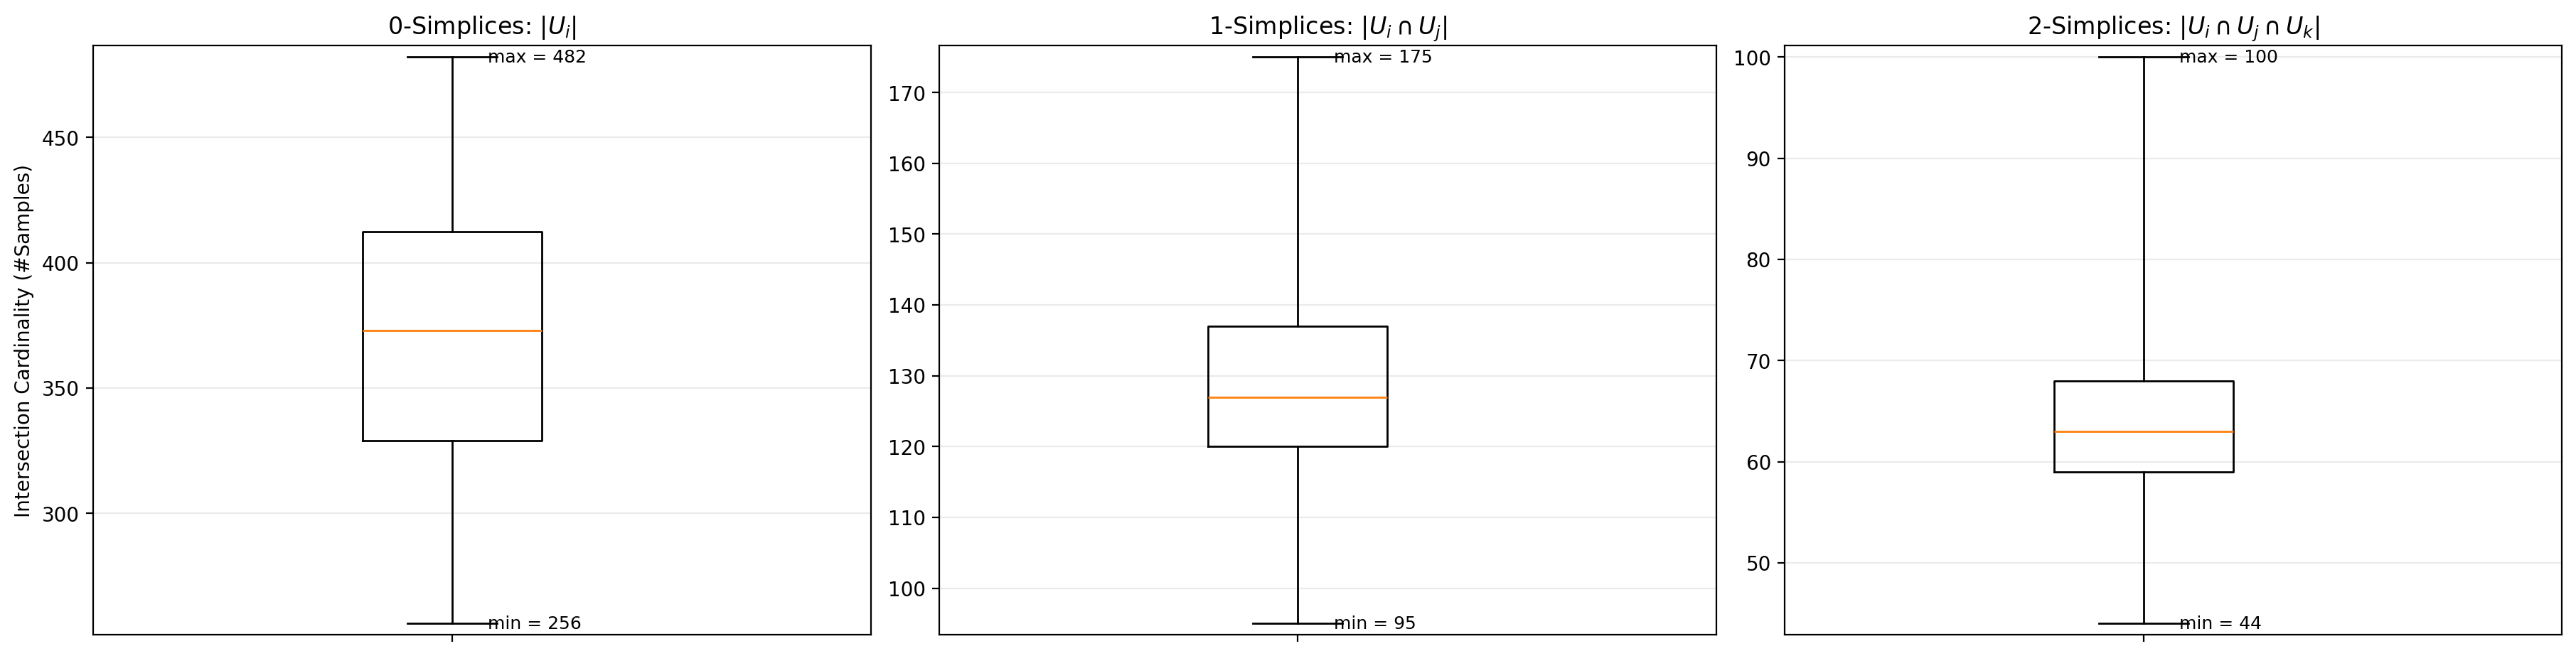

In [3]:
#Construct an open cover of RP2

n_landmarks = 80
cover = cb.make_s2_fibonacci_star_cover(base_points, n_vertices = n_landmarks)
summ = cover.summarize(plot = True)

In [4]:
#Compute local trivializations and characteristic classes using a quotient metric on S3
from circle_bundles.metrics import S3QuotientMetric

p = 4   #Choose a p-value for the quotient metric
total_metric = S3QuotientMetric(p=p, v_axis = v, antipodal = False)    

bundle = cb.build_bundle(
    data,
    cover,
#    CircularCoords_cls=CircularCoords,  #optionally use sparse circular coordinates
    total_metric = total_metric,
    show=True,
)


<IPython.core.display.Math object>

In [ ]:
#Compute class persistence on the weights filtration of the nerve
pers = bundle.get_persistence(show = True)


In [9]:
#Construct a classifying map to the Stiefel manifold and compute the pullback bundle
pullback_results = bundle.get_pullback_data(
    subcomplex = 'full',
    base_weight=1.0,
    fiber_weight=1.0,
    packing = 'none'
)




<IPython.core.display.Math object>

In [6]:
#Construct a pullback coordinate bundle object

pb_bundle = cb.build_bundle(
    pullback_results.total_data,
    cover,
#    CircularCoords_cls=CircularCoords,     #OPTION: use Dreimac for circular coordinates
    show=True,
    total_metric = pullback_results.metric 
)


<IPython.core.display.Math object>

In [8]:
#Show an interactive visualization of the coordinate bundle
app = pb_bundle.show_bundle()

Bundle viewer running at: http://127.0.0.1:50980/


# Quotients $(\mathbb{S}^{2}\times\mathbb{S}^{1})/\mathbb{Z}_{2}$ As Circle Bundles Over $\mathbb{RP}^{2}$ 

In [ ]:
#Generate a sample from the trivial bundle over S2
from synthetic.s2_bundles import sample_S2_trivial

n_samples = 10000
sigma = 0.05
data, base_points, angles = sample_S2_trivial(
    n_points = n_samples,
    sigma = sigma,
    radius_clip = (0.0, 5.0),
)
print(f'Generated {n_samples} samples from the product circle bundle over S2.')

In [ ]:
#Map base points to upper half sphere for visualization
base_points[base_points[:,-1] < 0] = -1*base_points[base_points[:,-1] < 0]

#Construct an open cover of RP2
n_landmarks = 80
cover = cb.make_rp2_fibonacci_star_cover(base_points, n_pairs = n_landmarks)
summ = cover.summarize(plot = True)

In [ ]:
#Compute local trivializations and characteristic classes

metrics = [cb.RP2_TrivialMetric(), cb.RP2_TwistMetric(), cb.RP2_FlipMetric()]  
           
j = 1         #Choose a metric on the total space
total_metric = metrics[j]


bundle = cb.build_bundle(
    data,
    cover,
#    CircularCoords_cls=CircularCoords,  #optionally use sparse cc's
    total_metric = total_metric,
    show=True,
)


In [ ]:
#Compute class persistence on the weights filtration of the nerve
pers = bundle.get_persistence(show = True)


In [ ]:
#Construct Stiefel frames
#and show mean squared error for PSC in different dimensions

tf = bundle.get_frame_dataset(
    reducer=None,
    max_frames = None,
    subcomplex = 'full')
Phi_true = tf.Y

#Choose dimensions to test
D = Phi_true.shape[1]
dims = list(range(2, min(D, 60) + 1, 2)) 

dims_arr, psc_err = cb.reduction_curve_psc(
    Phi_true=Phi_true,
    U=cover.U,
    dims=dims,
    max_frames=2000,     
    rng_seed=0,
    psc_verbosity=0,
    use_manopt=False,    
    plot = True,
)


# Quotients $\mathbb{S}^{3}/(\mathbb{Z}_{p}\rtimes\mathbb{Z}_{2})$ As Circle Bundles Over $\mathbb{RP}^{2}$

In [ ]:
from synthetic import sample_sphere, hopf_projection

n_samples = 10000
data = sample_sphere(n = n_samples, dim = 3)
v = np.array([1, 0, 0]) 
base_points = hopf_projection(data=data, v= v)


print(f'Generated {n_samples} samples from the product circle bundle over S2.')

In [ ]:
#Construct an open cover of RP2
n_landmarks = 80
cover = cb.make_rp2_fibonacci_star_cover(base_points, n_pairs = n_landmarks)
summ = cover.summarize(plot = True)

In [ ]:
#Compute local trivializations and characteristic classes using a quotient metric on S3
from circle_bundles.metrics import S3QuotientMetric


p = 2  #Choose a p-value for the quotient metric
total_metric = S3QuotientMetric(p = p, v_axis = v, antipodal = True)

bundle = cb.build_bundle(
    data,
    cover,
#    CircularCoords_cls=CircularCoords,  #optionally use sparse cc's 
    total_metric = total_metric,
    show=True,
)


In [ ]:
#Construct Stiefel frames
#and show mean squared error for PSC in different dimensions

tf = bundle.get_frame_dataset(
    reducer=None,
    max_frames = None,
    stage = 'post_projection',
    subcomplex = 'full')
Phi_true = tf.Y


D = Phi_true.shape[1]
dims = list(range(2, min(D, 60) + 1, 2)) 

dims_arr, psc_err = cb.reduction_curve_psc(
    Phi_true=Phi_true,
    U=cover.U,
    dims=dims,
    max_frames=2000,     
    rng_seed=0,
    psc_verbosity=0,
    use_manopt=False,    
    plot = True,
)


In [ ]:
#Compute a bundle map compatible with a subcomplex of the nerve
reduced_dim = 4
reducer = cb.FrameReducerConfig(method="psc", d=reduced_dim, max_frames=1000)
reducer = None
subcomplex = 'full'    # Choices are 'full', 'cocycle', 'max_trivial'
bm = bundle.get_bundle_map(show_summary = True, reducer = reducer, subcomplex = subcomplex)
F = bm.F


In [ ]:
#Show an interactive visualization of the data

app = cb.show_bundle_vis(base_points = base_points, 
                         data  = F, 
                         base_metric = cb.RP2UnitVectorMetric(), 
                         colors = None)
plt.show()

In [ ]:
#Run Ripser on a sample of the data

from ripser import ripser
from persim import plot_diagrams


# Run Ripser
dgms_2 = ripser(F, coeff=2, maxdim=2, n_perm=500)["dgms"]
dgms_3 = ripser(F, coeff=3, maxdim=2, n_perm=500)["dgms"]

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

plot_diagrams(dgms_2, ax=axes[0], title="coeff = 2")
plot_diagrams(dgms_3, ax=axes[1], title="coeff = 3")

plt.tight_layout()
plt.show()
